<a href="https://colab.research.google.com/github/haribabuofficial/assignment_1/blob/main/t3_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [1]:
import numpy as np

import pandas as pd

In [2]:
df = pd.read_csv("/content/cars_class.csv")

In [3]:
df.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

# drop unwanted features

In [5]:
df.drop(['ID'], axis = 1, inplace = True)

# finding duplicate value

In [6]:
df.duplicated().sum()

0

# split the data into feature and target

In [7]:
X = df.drop('Class', axis = 1)

In [8]:
X.columns

Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra'],
      dtype='object')

In [9]:
y = df['Class']

In [10]:
y.unique()

array([0, 3, 1, 2])

# Keep 20% of the data aside as test data


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 1)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((575, 18), (144, 18), (575,), (144,))

## Visualizing the data

<Axes: xlabel='Class', ylabel='Count'>

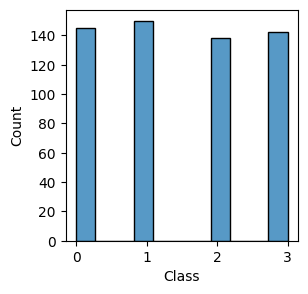

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize= (3, 3))

sns.histplot(y_train)

In [14]:
x_train.describe()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,93.460870,44.876522,81.883478,168.509565,61.685217,8.513043,168.436522,41.033043,20.547826,148.090435,187.963478,438.071304,174.429565,72.384348,6.386087,12.685217,188.944348,195.629565
std,8.141911,6.268420,15.534899,32.865890,7.518621,4.570709,33.410535,7.855442,2.597384,14.898220,31.085311,177.375358,32.686103,7.147776,4.832434,8.602733,6.130153,7.194183
min,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.500000,191.000000
50%,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.500000,216.000000,584.500000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,109.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,262.000000,127.000000,22.000000,41.000000,204.000000,211.000000


<ipython-input-15-f410f9c132fa>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(x_train).set_xticklabels(labels = x_train.columns, rotation = 90)


[]

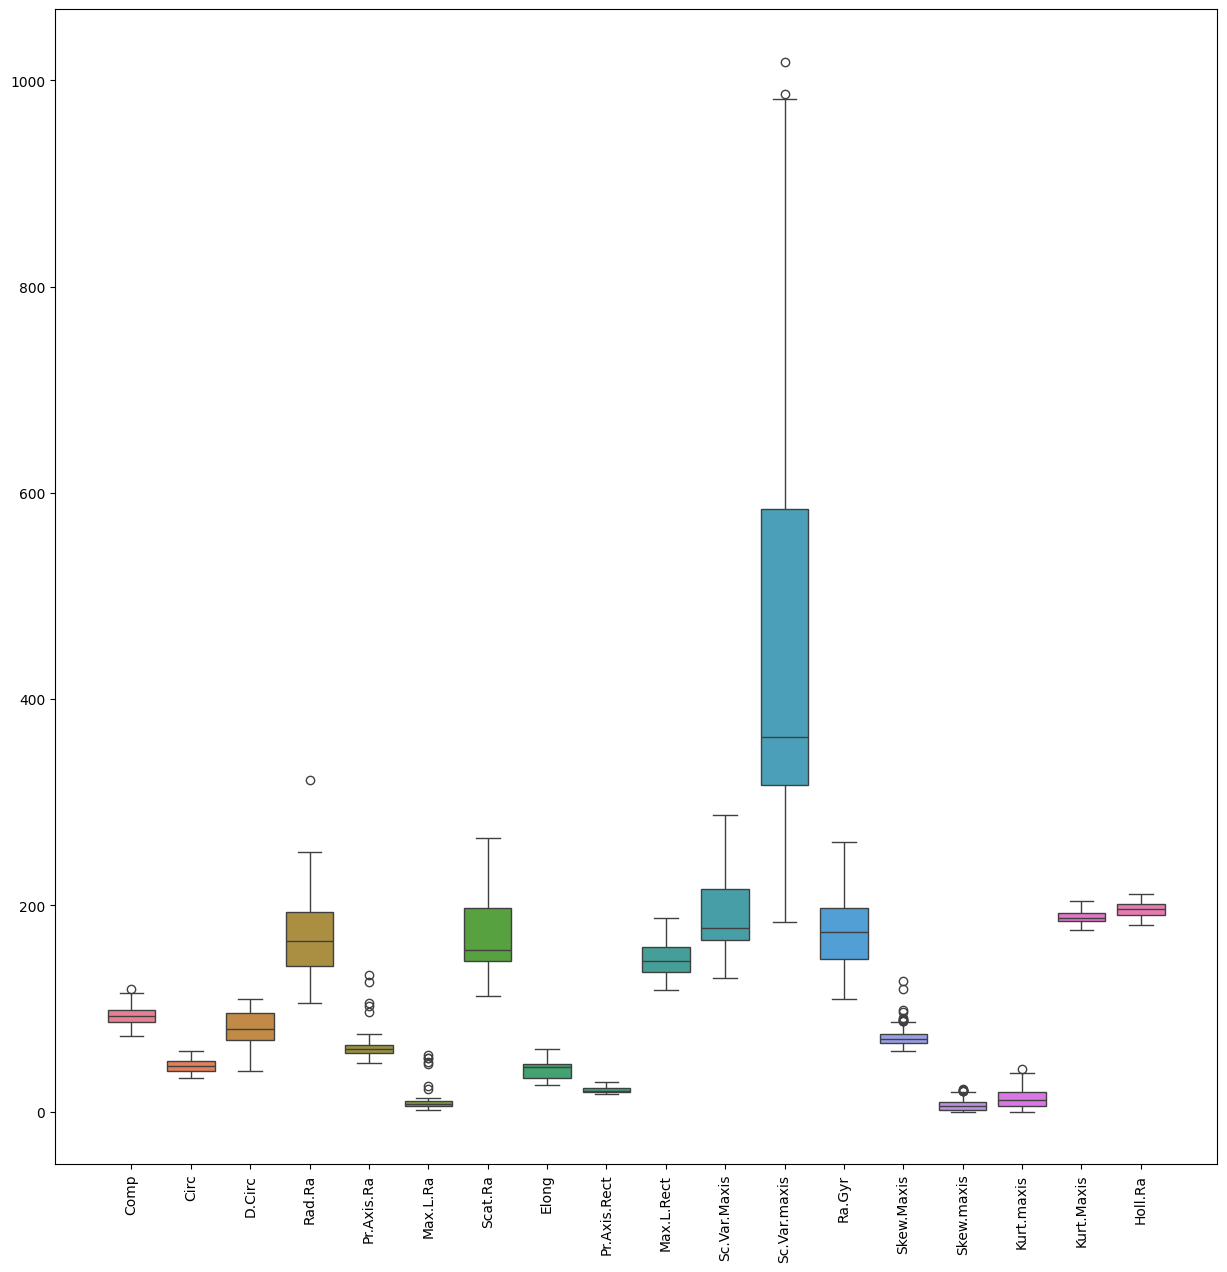

In [15]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize = (15, 15))

sns.boxplot(x_train).set_xticklabels(labels = x_train.columns, rotation = 90)

plt.plot()

# preprocessing

## Outlier Detection

In [16]:
from scipy import stats

outlier_detection = np.abs(stats.zscore(x_train))

In [17]:
outlier_detection.head(3)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
34,1.295557,1.137397,0.909489,0.593546,0.357453,0.106631,0.586058,0.768677,0.559578,0.867272,0.580732,0.518723,0.936087,0.753946,0.955612,0.545094,0.662167,0.608025
185,0.548367,1.097966,0.250202,0.472316,0.091215,0.331319,0.672125,0.632846,0.596436,1.416867,0.707170,0.700093,0.993015,0.473895,1.322656,0.428751,0.317454,0.226709
154,0.425439,0.339053,0.200789,0.228690,0.308141,0.325606,0.162860,0.123201,0.211098,0.800091,0.352997,0.276893,0.323674,0.086207,0.541381,1.475841,0.643994,0.087587


In [18]:
outlier_detection[outlier_detection > 3].count()

,0
Comp,1
Circ,0
D.Circ,0
Rad.Ra,1
Pr.Axis.Ra,5
Max.L.Ra,6
Scat.Ra,0
Elong,0
Pr.Axis.Rect,1
Max.L.Rect,0


In [19]:
np.where(outlier_detection > 3)[0]

array([  6,   6,  50, 117, 117, 117, 142, 142, 177, 177, 186, 201, 201,
       201, 234, 241, 293, 308, 362, 385, 385, 385, 385, 401, 401, 401,
       434, 434, 434, 557])

In [20]:
np.unique(np.where(outlier_detection > 3)[0])

array([  6,  50, 117, 142, 177, 186, 201, 234, 241, 293, 308, 362, 385,
       401, 434, 557])

In [21]:
len(np.unique(np.where(outlier_detection > 3)[0]))

16

In [22]:
x_train.shape

(575, 18)

In [23]:
x_train_2 = x_train[(outlier_detection < 3).all(axis = 1)]      # all -> elements along an axis are True [0 (default): Check for all columns (column-wise). 1: Check for all rows (row-wise)]

In [24]:
x_train_2.shape

(559, 18)

In [25]:
y_train.shape

(575,)

In [26]:
y_train_2 = y_train[(outlier_detection < 3).all(axis = 1)]

In [27]:
y_train_2.shape

(559,)

## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

sx_train = ss.fit_transform(x_train_2)

sx_test = ss.transform(x_test)

# Apply different machine learning techniques.

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(sx_train, y_train_2)

LogisticRegression()

In [30]:
pred = lr.predict(sx_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7986111111111112

In [32]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.7986111111111112

## SVC

In [33]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(sx_train, y_train_2)

SVC()

In [34]:
pred = svc.predict(sx_test)

In [35]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7222222222222222

In [36]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.7222222222222222

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kc = KNeighborsClassifier()

kc.fit(sx_train, y_train_2)

KNeighborsClassifier()

In [38]:
pred = kc.predict(sx_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7152777777777778

In [40]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')   # [None, 'micro', 'macro', 'weighted']

0.7152777777777778

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train_2, y_train_2)

DecisionTreeClassifier()

In [42]:
dtc.feature_importances_

array([0.0444696 , 0.00851237, 0.06374032, 0.01763843, 0.02353834,
       0.21620384, 0.        , 0.01927894, 0.        , 0.08250947,
       0.14960298, 0.13653251, 0.05708284, 0.03307814, 0.05646024,
       0.02784815, 0.03596124, 0.02754259])

In [43]:
pd.DataFrame(dtc.feature_importances_, index = X.columns, columns = ['Important']).sort_values('Important', ascending = False)

,Important
Max.L.Ra,0.216204
Sc.Var.Maxis,0.149603
Sc.Var.maxis,0.136533
Max.L.Rect,0.082509
D.Circ,0.063740
Ra.Gyr,0.057083
Skew.maxis,0.056460
Comp,0.044470
Kurt.Maxis,0.035961
Skew.Maxis,0.033078


In [44]:
pred = dtc.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7083333333333334

In [46]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.7083333333333334

## Ensemble Learning

### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(x_train_2, y_train_2)

RandomForestClassifier()

In [48]:
rfc.feature_importances_

array([0.05142529, 0.03676064, 0.06966282, 0.04287995, 0.0522561 ,
       0.12417064, 0.06038657, 0.05359856, 0.02496539, 0.0767881 ,
       0.06652898, 0.08943424, 0.03788058, 0.0486006 , 0.04205215,
       0.04086916, 0.03292444, 0.0488158 ])

In [49]:
pd.DataFrame(rfc.feature_importances_, index = X.columns, columns = ["Important"]).sort_values('Important', ascending = False)

,Important
Max.L.Ra,0.124171
Sc.Var.maxis,0.089434
Max.L.Rect,0.076788
D.Circ,0.069663
Sc.Var.Maxis,0.066529
Scat.Ra,0.060387
Elong,0.053599
Pr.Axis.Ra,0.052256
Comp,0.051425
Holl.Ra,0.048816


In [50]:
pred = rfc.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7638888888888888

In [52]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.7638888888888888

### AdaBoost Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

abc.fit(x_train_2, y_train_2)

AdaBoostClassifier()

In [54]:
pred = abc.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.6041666666666666

In [56]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.6041666666666666

### GradientBoosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(x_train_2, y_train_2)

GradientBoostingClassifier()

In [58]:
pred = gbc.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7430555555555556

In [60]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.7430555555555556

# Tune the parameters of models for Logistic Regression

In [61]:
import warnings

warnings.filterwarnings("ignore")

In [62]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [63]:
lr = LogisticRegression()

params = {'C': [0.2, 0.5, 0.7, 1],
           "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}

skf = StratifiedKFold(n_splits = 5)

gcv = GridSearchCV(lr, param_grid = params, cv = skf, scoring = 'accuracy')

gcv.fit(sx_train, y_train_2)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.5, 0.7, 1],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [64]:
gcv.best_score_   # accuracy

0.7744530244530243

In [65]:
gcv.best_params_

{'C': 1, 'solver': 'lbfgs'}

In [66]:
gcv.best_estimator_

LogisticRegression(C=1)

In [67]:
pred = gcv.best_estimator_.predict(sx_test)

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7986111111111112

In [69]:
from sklearn.metrics import f1_score

f1_score(y_test, pred, average = 'micro')

0.7986111111111112

In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[43,  0,  0,  1],
       [ 3, 14, 11,  2],
       [ 1,  9, 24,  1],
       [ 1,  0,  0, 34]])

# The importance of different features

## Correlation

In [71]:
x_train_2.corr()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
Comp,1.000000,0.680652,0.776122,0.757741,0.255178,0.465628,0.806332,-0.786875,0.805745,0.670166,0.790343,0.812699,0.573726,-0.279208,0.154368,0.127157,0.317893,0.391359
Circ,0.680652,1.000000,0.801883,0.658869,0.241924,0.561889,0.860686,-0.825497,0.859751,0.967251,0.817669,0.853931,0.938277,0.041486,0.102320,-0.045120,-0.114732,0.052533
D.Circ,0.776122,0.801883,1.000000,0.816269,0.288023,0.652187,0.906906,-0.909171,0.896432,0.780895,0.886611,0.891145,0.715090,-0.270790,0.077431,0.213789,0.137578,0.337859
Rad.Ra,0.757741,0.658869,0.816269,1.000000,0.688197,0.441709,0.808470,-0.858278,0.780669,0.594601,0.817312,0.801783,0.578457,-0.400342,0.017455,0.153580,0.413136,0.498515
Pr.Axis.Ra,0.255178,0.241924,0.288023,0.688197,1.000000,0.160985,0.254430,-0.350546,0.221386,0.192227,0.273924,0.244453,0.209109,-0.293843,-0.055348,-0.038317,0.386141,0.401649
Max.L.Ra,0.465628,0.561889,0.652187,0.441709,0.160985,1.000000,0.505240,-0.503645,0.507614,0.644884,0.425138,0.472196,0.437607,-0.311016,0.094676,0.074909,0.024580,0.355772
Scat.Ra,0.806332,0.860686,0.906906,0.808470,0.254430,0.505240,1.000000,-0.973977,0.991316,0.816062,0.979731,0.996654,0.795084,-0.032261,0.015367,0.185527,0.011711,0.142994
Elong,-0.786875,-0.825497,-0.909171,-0.858278,-0.350546,-0.503645,-0.973977,1.000000,-0.949820,-0.775332,-0.970057,-0.958864,-0.764287,0.121995,-0.001048,-0.157799,-0.121246,-0.235268
Pr.Axis.Rect,0.805745,0.859751,0.896432,0.780669,0.221386,0.507614,0.991316,-0.949820,1.000000,0.820845,0.965025,0.991678,0.793167,-0.012852,0.026783,0.189064,-0.018498,0.119054
Max.L.Rect,0.670166,0.967251,0.780895,0.594601,0.192227,0.644884,0.816062,-0.775332,0.820845,1.000000,0.757276,0.805383,0.874628,0.018091,0.105980,-0.038088,-0.110192,0.087712


<Axes: >

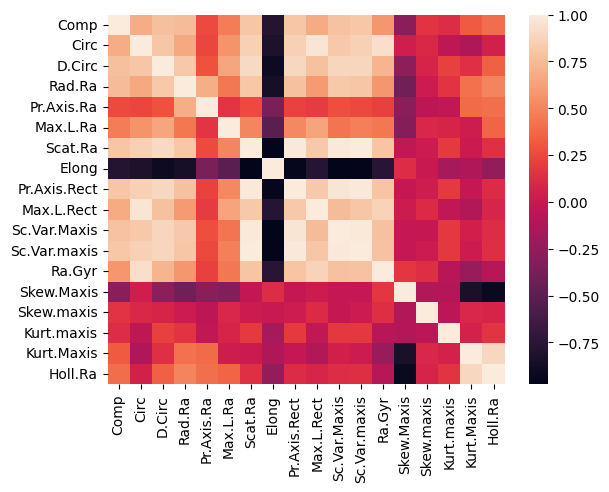

In [72]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(x_train_2.corr())



## Resursive Feature Elimination

In [73]:
len(X.columns)

18

In [74]:
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression()

accuracy = []

f1 = []

for num_selected_feature in range(18, 0, -1):

  rfe = RFE(lr, n_features_to_select = num_selected_feature)

  rfe.fit(sx_train, y_train_2)

  lr.fit(sx_train[:, rfe.support_], y_train_2)

  pred = lr.predict(sx_test[:, rfe.support_])

  accuracy.append(accuracy_score(y_test, pred))

  f1.append(f1_score(y_test, pred, average = 'micro'))

In [75]:
accuracy

[0.7986111111111112,
 0.7777777777777778,
 0.7638888888888888,
 0.7638888888888888,
 0.7638888888888888,
 0.7638888888888888,
 0.7708333333333334,
 0.7152777777777778,
 0.7152777777777778,
 0.6944444444444444,
 0.6875,
 0.6875,
 0.7013888888888888,
 0.5902777777777778,
 0.5763888888888888,
 0.5833333333333334,
 0.4930555555555556,
 0.3958333333333333]

In [76]:
accuracy.index(max(accuracy))

0

In [77]:
f1

[0.7986111111111112,
 0.7777777777777778,
 0.7638888888888888,
 0.7638888888888888,
 0.7638888888888888,
 0.7638888888888888,
 0.7708333333333334,
 0.7152777777777778,
 0.7152777777777778,
 0.6944444444444444,
 0.6875,
 0.6875,
 0.7013888888888888,
 0.5902777777777778,
 0.5763888888888888,
 0.5833333333333334,
 0.4930555555555556,
 0.3958333333333333]

In [78]:
f1.index(max(f1))

0